# Q1 Import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Q2 Load the data

In [4]:
boston_crime = pd.read_csv('Boston_crime.csv', encoding='latin-1')
boston_crime.head(10)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2020,4,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2020,4,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2020,4,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2020,4,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2020,4,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
5,I182070936,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,NaN,2020,4,Monday,21,Part Three,TALBOT AVE,42.290196,-71.071590,"(42.29019621, -71.07159012)"
6,I182070933,724,Auto Theft,AUTO THEFT,B2,330,NaN,2020,4,Monday,21,Part One,NORMANDY ST,42.306072,-71.082733,"(42.30607218, -71.08273260)"
7,I182070932,3301,Verbal Disputes,VERBAL DISPUTE,B2,584,NaN,2020,4,Monday,20,Part Three,LAWN ST,42.327016,-71.105551,"(42.32701648, -71.10555088)"
8,I182070931,301,Robbery,ROBBERY - STREET,C6,177,NaN,2020,4,Monday,20,Part One,MASSACHUSETTS AVE,42.331521,-71.070853,"(42.33152148, -71.07085307)"
9,I182070929,3301,Verbal Disputes,VERBAL DISPUTE,C11,364,NaN,2020,4,Monday,20,Part Three,LESLIE ST,42.295147,-71.058608,"(42.29514664, -71.05860832)"


# Variable identifications steps
# Q3 Tabulated data types of the features

In [12]:
crime_counts = boston_crime['OFFENSE_CODE_GROUP'].value_counts()
crime_counts

OFFENSE_CODE_GROUP
Motor Vehicle Accident Response              37132
Larceny                                      25935
Medical Assistance                           23540
Investigate Person                           18750
Other                                        18075
                                             ...  
HUMAN TRAFFICKING                                7
INVESTIGATE PERSON                               4
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        2
Burglary - No Property Taken                     2
Biological Threat                                2
Name: count, Length: 67, dtype: int64

In [6]:
boston_crime.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,319073.000000,319073.000000,319073.000000,319073.000000,299074.000000,299074.000000
mean,2317.546956,2018.393264,5.158609,13.118205,42.214381,-70.908272
std,1185.285543,1.286184,3.304448,6.294205,2.159766,3.493618
min,111.000000,2016.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2018.000000,4.000000,9.000000,42.297442,-71.097135
50%,2907.000000,2019.000000,4.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2019.000000,4.000000,18.000000,42.348624,-71.062467
max,3831.000000,2020.000000,12.000000,23.000000,42.395042,-1.000000


# Q4 Data types of features

In [9]:
boston_crime.dtypes

INCIDENT_NUMBER         object
OFFENSE_CODE             int64
OFFENSE_CODE_GROUP      object
OFFENSE_DESCRIPTION     object
DISTRICT                object
REPORTING_AREA          object
SHOOTING                object
YEAR                     int64
MONTH                    int64
DAY_OF_WEEK             object
HOUR                     int64
UCR_PART                object
STREET                  object
Lat                    float64
Long                   float64
Location                object
dtype: object

In [10]:
boston_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319073 non-null  object 
 1   OFFENSE_CODE         319073 non-null  int64  
 2   OFFENSE_CODE_GROUP   319073 non-null  object 
 3   OFFENSE_DESCRIPTION  319073 non-null  object 
 4   DISTRICT             317308 non-null  object 
 5   REPORTING_AREA       319073 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   YEAR                 319073 non-null  int64  
 8   MONTH                319073 non-null  int64  
 9   DAY_OF_WEEK          319073 non-null  object 
 10  HOUR                 319073 non-null  int64  
 11  UCR_PART             318983 non-null  object 
 12  STREET               308202 non-null  object 
 13  Lat                  299074 non-null  float64
 14  Long                 299074 non-null  float64
 15  Location         

# Q5 Change data type

In [11]:
boston_crime['DAY_OF_WEEK'] = boston_crime['DAY_OF_WEEK'].astype('category')
boston_crime['OFFENSE_CODE_GROUP'] = boston_crime['OFFENSE_CODE_GROUP'].astype('category')

boston_crime.dtypes

INCIDENT_NUMBER          object
OFFENSE_CODE              int64
OFFENSE_CODE_GROUP     category
OFFENSE_DESCRIPTION      object
DISTRICT                 object
REPORTING_AREA           object
SHOOTING                 object
YEAR                      int64
MONTH                     int64
DAY_OF_WEEK            category
HOUR                      int64
UCR_PART                 object
STREET                   object
Lat                     float64
Long                    float64
Location                 object
dtype: object

# Q6 Value counts of specific columns

In [13]:
boston_crime['DAY_OF_WEEK'].value_counts()

DAY_OF_WEEK
Friday       48495
Wednesday    46729
Thursday     46656
Tuesday      46383
Monday       45679
Saturday     44818
Sunday       40313
Name: count, dtype: int64

In [14]:
boston_crime['OFFENSE_CODE_GROUP'].value_counts()

OFFENSE_CODE_GROUP
Motor Vehicle Accident Response              37132
Larceny                                      25935
Medical Assistance                           23540
Investigate Person                           18750
Other                                        18075
                                             ...  
HUMAN TRAFFICKING                                7
INVESTIGATE PERSON                               4
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        2
Burglary - No Property Taken                     2
Biological Threat                                2
Name: count, Length: 67, dtype: int64

# Q7 show unique values 

In [15]:
boston_crime['UCR_PART'].unique()

array(['Part One', 'Part Two', 'Part Three', 'Other', nan], dtype=object)

# Q8 Filter the dataset to show only specific values in column

In [16]:
filtered = boston_crime[boston_crime['UCR_PART'].isin(['Part One', 'Part Two', 'Part Three'])]

filtered.shape

(317751, 16)

# Q9 Drop the columns

In [17]:
cols_to_drop = [
    'INCIDENT_NUMBER',
    'OFFENSE_CODE',
    'OFFENSE_DESCRIPTION',
    'REPORTING_AREA',
    'SHOOTING',
    'STREET',
    'Lat',
    'Long',
    'Location'
]

dropped = boston_crime.drop(columns=[c for c in cols_to_drop if c in boston_crime.columns])

In [19]:
dropped.head(10)

,OFFENSE_CODE_GROUP,DISTRICT,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART
0,Larceny,D14,2020,4,Sunday,13,Part One
1,Vandalism,C11,2020,4,Tuesday,0,Part Two
2,Towed,D4,2020,4,Monday,19,Part Three
3,Investigate Property,D4,2020,4,Monday,21,Part Three
4,Investigate Property,B3,2020,4,Monday,21,Part Three
5,Motor Vehicle Accident Response,C11,2020,4,Monday,21,Part Three
6,Auto Theft,B2,2020,4,Monday,21,Part One
7,Verbal Disputes,B2,2020,4,Monday,20,Part Three
8,Robbery,C6,2020,4,Monday,20,Part One
9,Verbal Disputes,C11,2020,4,Monday,20,Part Three


# Missing values treatment

# Q10 Missing values in each column

In [21]:
boston_crime.isnull().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318054
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19999
Long                    19999
Location                    0
dtype: int64

# Q11 Drop the DISTRICT column

In [24]:
bc_no_dist = boston_crime.dropna(subset=["DISTRICT"])

In [25]:
bc_no_dist['DISTRICT'].isnull().sum()

np.int64(0)

In [26]:
bc_no_dist.shape

(317308, 16)

# Outliers treatment

# Q11_1 Subplots to draw a hsitogram

In [27]:
num_cols = boston_crime.select_dtypes(include='number').columns
num_cols

Index(['OFFENSE_CODE', 'YEAR', 'MONTH', 'HOUR', 'Lat', 'Long'], dtype='object')

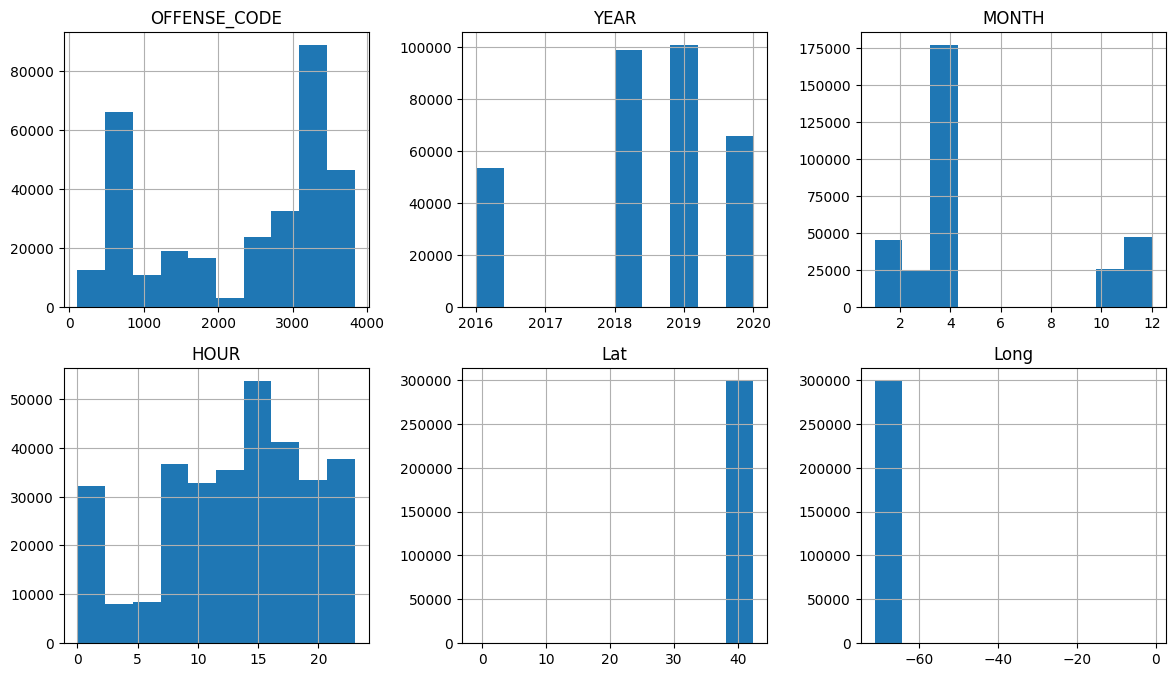

In [34]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    boston_crime[col].hist(ax=axes[i])
    axes[i].set_title(col)

for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Questions

# Q12 What is the most common type of crime in Boston? 

In [35]:
boston_crime.head(10)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2020,4,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2020,4,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2020,4,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2020,4,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2020,4,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
5,I182070936,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,NaN,2020,4,Monday,21,Part Three,TALBOT AVE,42.290196,-71.071590,"(42.29019621, -71.07159012)"
6,I182070933,724,Auto Theft,AUTO THEFT,B2,330,NaN,2020,4,Monday,21,Part One,NORMANDY ST,42.306072,-71.082733,"(42.30607218, -71.08273260)"
7,I182070932,3301,Verbal Disputes,VERBAL DISPUTE,B2,584,NaN,2020,4,Monday,20,Part Three,LAWN ST,42.327016,-71.105551,"(42.32701648, -71.10555088)"
8,I182070931,301,Robbery,ROBBERY - STREET,C6,177,NaN,2020,4,Monday,20,Part One,MASSACHUSETTS AVE,42.331521,-71.070853,"(42.33152148, -71.07085307)"
9,I182070929,3301,Verbal Disputes,VERBAL DISPUTE,C11,364,NaN,2020,4,Monday,20,Part Three,LESLIE ST,42.295147,-71.058608,"(42.29514664, -71.05860832)"


In [37]:
boston_crime['OFFENSE_CODE_GROUP'].value_counts()

OFFENSE_CODE_GROUP
Motor Vehicle Accident Response              37132
Larceny                                      25935
Medical Assistance                           23540
Investigate Person                           18750
Other                                        18075
                                             ...  
HUMAN TRAFFICKING                                7
INVESTIGATE PERSON                               4
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        2
Burglary - No Property Taken                     2
Biological Threat                                2
Name: count, Length: 67, dtype: int64

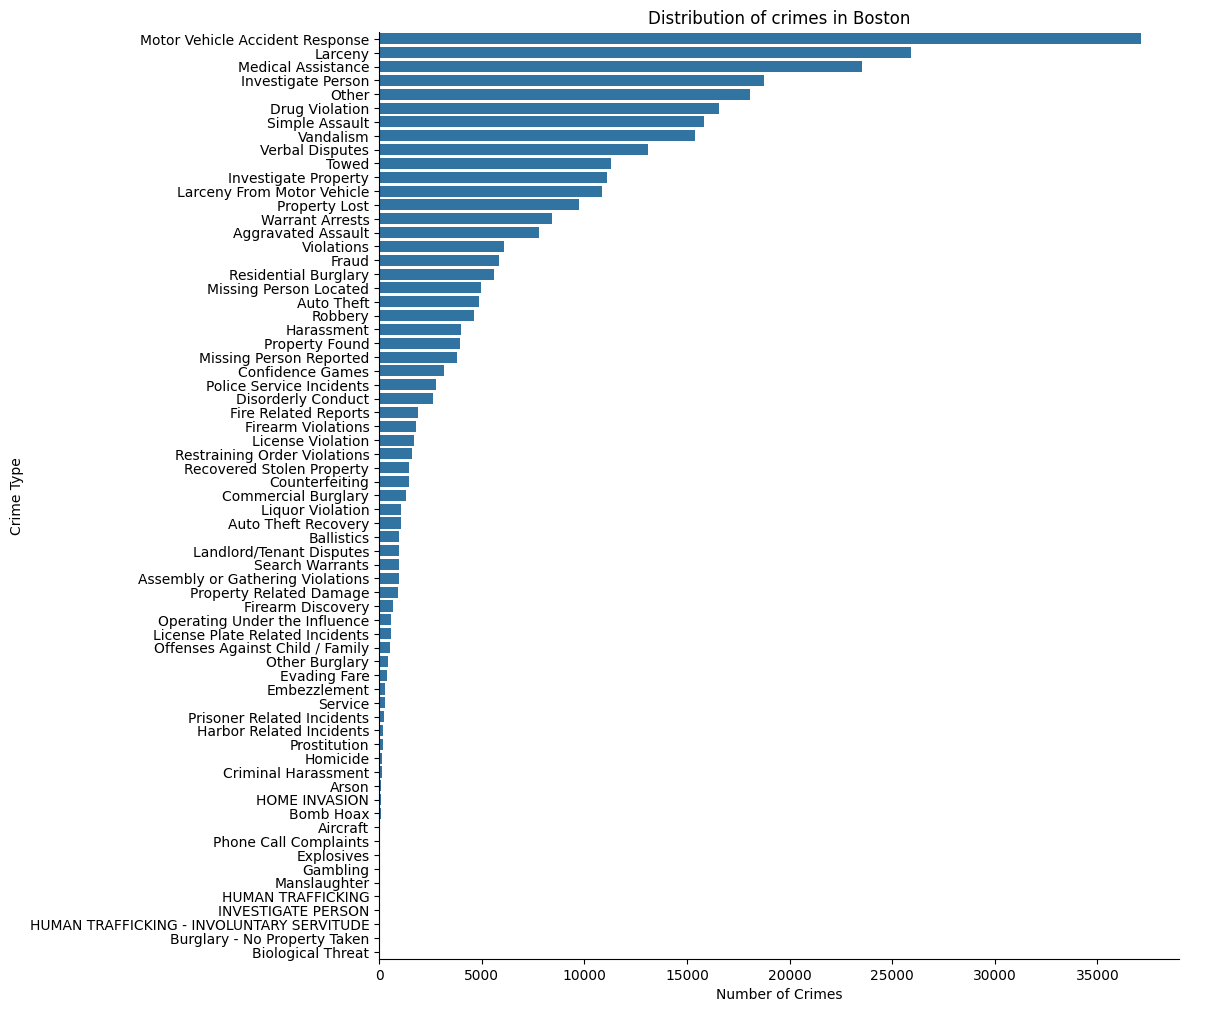

In [39]:
sns.catplot(data=boston_crime,
            y="OFFENSE_CODE_GROUP",
            kind="count",
            order=boston_crime["OFFENSE_CODE_GROUP"].value_counts().index,
            height=10,
            aspect=1.2)

plt.xlabel("Number of Crimes")
plt.ylabel("Crime Type")
plt.title("Distribution of crimes in Boston")
plt.show()

### The three most of the crimes are 
* Motor Vehicle Accident Response              37132
* Larceny                                      25935
* Medical Assistance                           23540

# Q13 Which year has the highest rate of crimes?

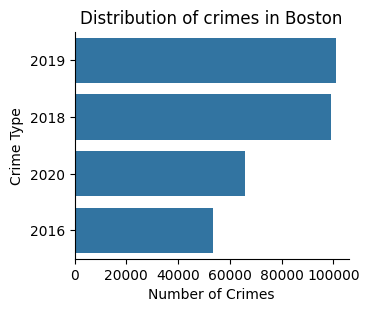

In [44]:
sns.catplot(data=boston_crime,
            y="YEAR",
            kind="count",
            order=boston_crime["YEAR"].value_counts().index,
            height=3,
            aspect=1.2)

plt.xlabel("Number of Crimes")
plt.ylabel("Crime Type")
plt.title("Distribution of crimes in Boston")
plt.show()

### It is obviously, 2019, and we see huge decline in 2020, mostly due to lockdown

# Q14. What is the most common type of Uniform Crime Reporting Offence (UCR Part) in Boston?

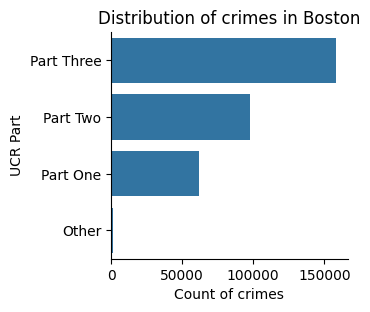

In [47]:
sns.catplot(data=boston_crime,
            y="UCR_PART",
            kind="count",
            order=boston_crime["UCR_PART"].value_counts().index,
            height=3,
            aspect=1.2)

plt.xlabel("Count of crimes")
plt.ylabel("UCR Part")
plt.title("Distribution of crimes in Boston")
plt.show()

### Part three has the most amount of crimes

# Q15 Which district in boston is the most dangerous district and which one is the safest?

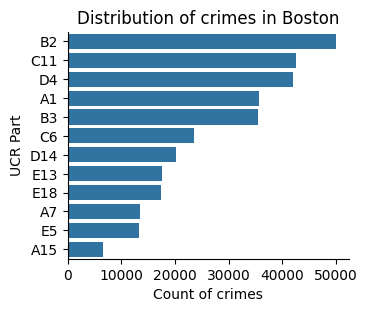

In [48]:
sns.catplot(data=bc_no_dist,
            y="DISTRICT",
            kind="count",
            order=bc_no_dist["DISTRICT"].value_counts().index,
            height=3,
            aspect=1.2)

plt.xlabel("Count of crimes")
plt.ylabel("UCR Part")
plt.title("Distribution of crimes in Boston")
plt.show()

### The most dangerous district in Boston is Roxburry(B2)
### The most safest district in Boston is Charlestown(A15)